## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-1162196871.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'customer-shopping-trends-dataset' dataset.


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

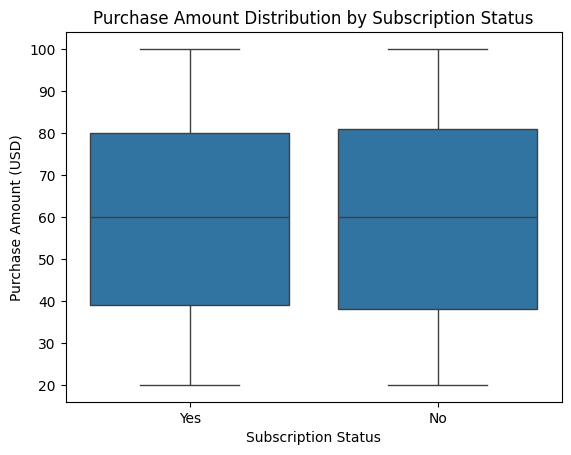

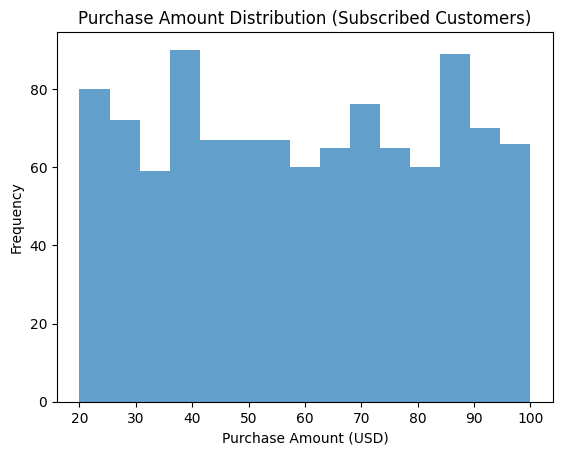

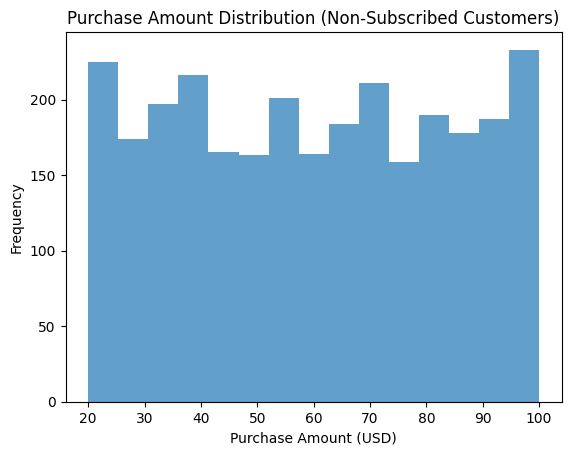

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
#Seaborn’s boxplot
sns.boxplot(
    x="Subscription Status",
    y="Purchase Amount (USD)",
    data=df
)
plt.title("Purchase Amount Distribution by Subscription Status")
plt.show()
#Matplotlib’s histogram.
yes = df[df["Subscription Status"] == "Yes"]["Purchase Amount (USD)"]
no  = df[df["Subscription Status"] == "No"]["Purchase Amount (USD)"]

# Histogram for Subscribed customers

plt.hist(yes, bins=15, alpha=0.7)
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.title("Purchase Amount Distribution (Subscribed Customers)")
plt.show()

# Histogram for Non-Subscribed customers

plt.hist(no, bins=15, alpha=0.7)
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.title("Purchase Amount Distribution (Non-Subscribed Customers)")
plt.show()

subscription_counts = df["Subscription Status"].value_counts()
print(subscription_counts)

#what we see from the box plot
#Median purchase amount is nearly the same which means Subscribed customers don’t spend more per transaction
#Spread is the same which means Spending behavior is consistent across both groups

#I decided to make two sepertate histograms so it's more clear at first i made both sunscribed and non in one and it was not clear
#Subscribed customers don’t spend more per purchase (same price range as non-subscribed)
#Surprisingly non-subscribed customers are much more frequent buyers in terms of transaction counts in the data
#This suggests having a subscription doesn’t necessarily make someone a bigger spender or more frequent buyer
#I also wanted to understand why the non subscrubed were more frequent so i wanted to see if this is just because of number difference and i was right
#Non-subscribed customers outnumber subscribed customers almost 3 to 1
#That’s why the non subscribed histogram bars are taller there are simply more people in that group making purchases in the $20–$60 range

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

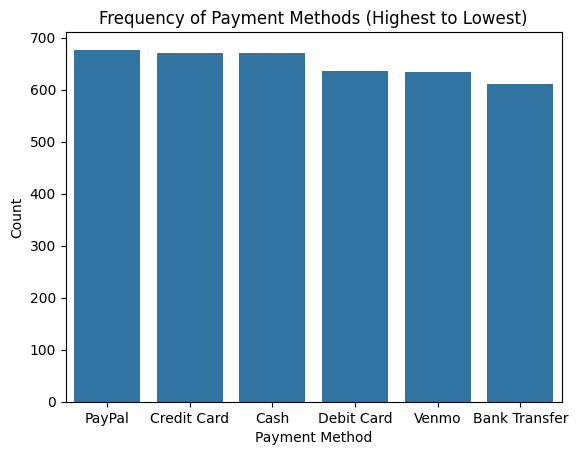

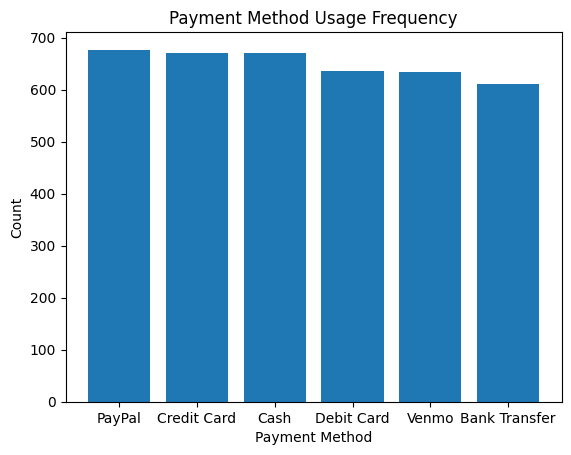

In [4]:
payment_order = df["Payment Method"].value_counts().index
#Seaborn's countplot
sns.countplot(
    data=df,
    x="Payment Method",
    order=payment_order
)
plt.title("Frequency of Payment Methods (Highest to Lowest)")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

payment_counts = df["Payment Method"].value_counts()
#Matplotlib's bar plot
plt.bar(payment_counts.index, payment_counts.values)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Payment Method Usage Frequency")
plt.show()
#People prefer Credit Cards most
#Digital payments (PayPal + Venmo) together are very popular modern customers like them
#Bank Transfers and Debit Cards are less used maybe they're slower or less convenient
#Cash is still used
#takeaway You should focus on making Credit Card and PayPal payments fast since most customers use those

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

Gender  Female  Male
Season              
Fall       328   647
Spring     316   683
Summer     298   657
Winter     306   665


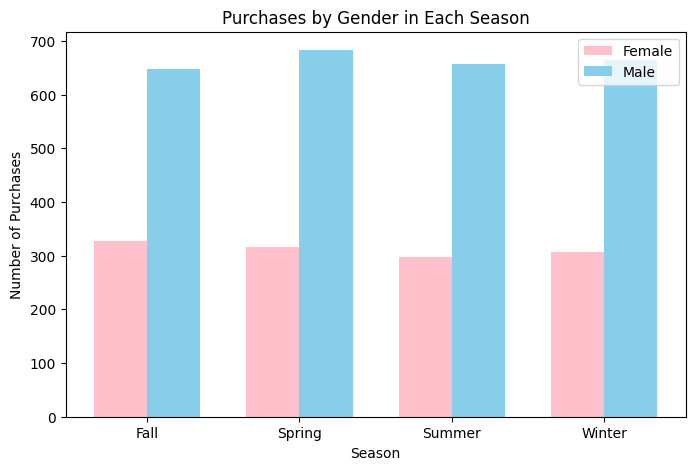

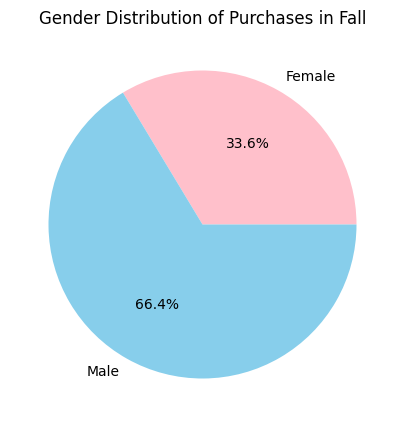

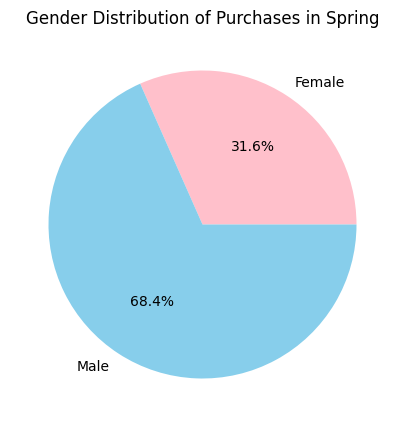

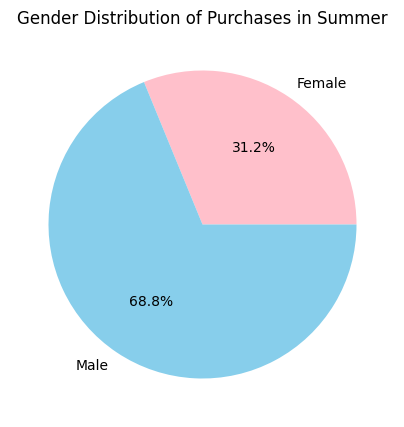

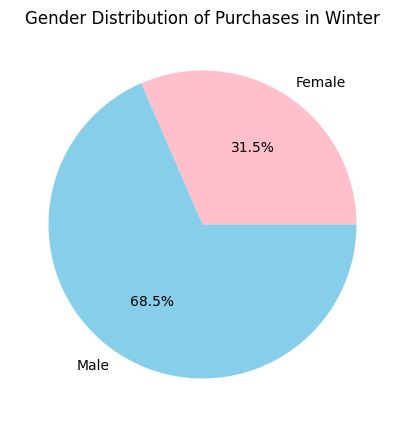

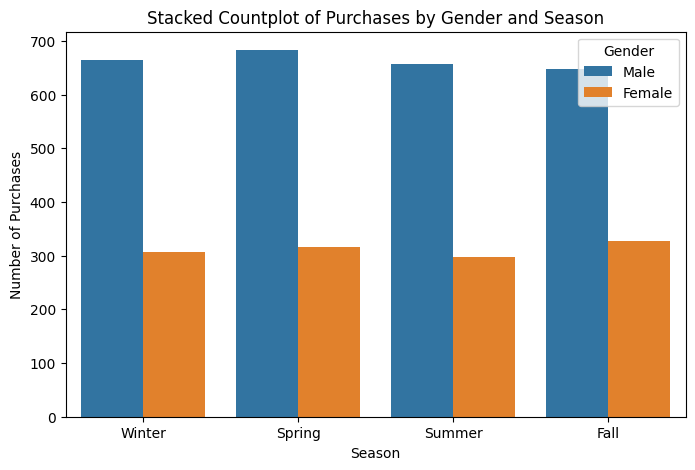

In [5]:
import pandas as pd
import numpy as np
# Group by Season and Gender
gender_season_counts = df.groupby(['Season', 'Gender']).size().unstack(fill_value=0)
print(gender_season_counts)
import matplotlib.pyplot as plt
import numpy as np
#grouped bar chart
seasons = gender_season_counts.index
female_counts = gender_season_counts['Female']
male_counts = gender_season_counts['Male']

x = np.arange(len(seasons))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, female_counts, width, label='Female', color='pink')
plt.bar(x + width/2, male_counts, width, label='Male', color='skyblue')

plt.xticks(x, seasons)
plt.xlabel("Season")
plt.ylabel("Number of Purchases")
plt.title("Purchases by Gender in Each Season")
plt.legend()
plt.show()
#Pie chart using Matplotlib
for season in gender_season_counts.index:
    counts = gender_season_counts.loc[season]
    plt.figure(figsize=(5,5))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['pink','skyblue'])
    plt.title(f"Gender Distribution of Purchases in {season}")
    plt.show()
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Season',
    hue='Gender'
)
plt.title("Stacked Countplot of Purchases by Gender and Season")
plt.ylabel("Number of Purchases")
plt.show()

#Women made about 1,248 purchases across all seasons
#Men made about 2,652 purchases across all seasons
#Men shop more in every season  They made about twice as many purchases as women in this data
#Spring highest sales for men
#Season doesn’t change the gender gap Men always shop more than women, no matter the season


### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

                       Customer ID       Age  Purchase Amount (USD)  \
Customer ID               1.000000 -0.004079               0.011048   
Age                      -0.004079  1.000000              -0.010424   
Purchase Amount (USD)     0.011048 -0.010424               1.000000   
Review Rating             0.001343 -0.021949               0.030776   
Previous Purchases       -0.039159  0.040445               0.008063   

                       Review Rating  Previous Purchases  
Customer ID                 0.001343           -0.039159  
Age                        -0.021949            0.040445  
Purchase Amount (USD)       0.030776            0.008063  
Review Rating               1.000000            0.004229  
Previous Purchases          0.004229            1.000000  


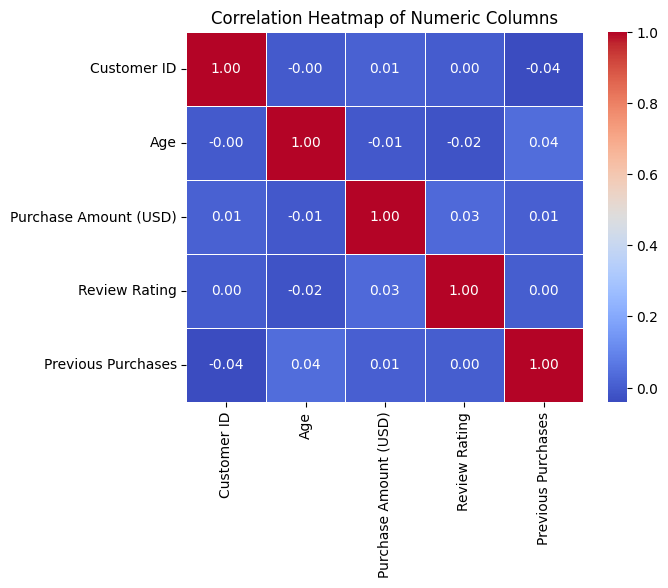

In [6]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_cols.corr()
print(corr_matrix)
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()
#Previous Purchases vs. Purchase Amount
#Correlation = 0.008 closer to zero (no link)
#Meaning How often someone shops has no real link to how much they spend per purchase
#Previous Purchases vs Review Rating
#Correlation = 0.004 close to aero
#Meaning How often someone shops has no link to the star ratings they give
#Purchase Amount vs Review Rating
#Correlation = 0.031 very weak positive link
#Meaning People who spend a little more might give slightly higher ratings but it's very faint

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

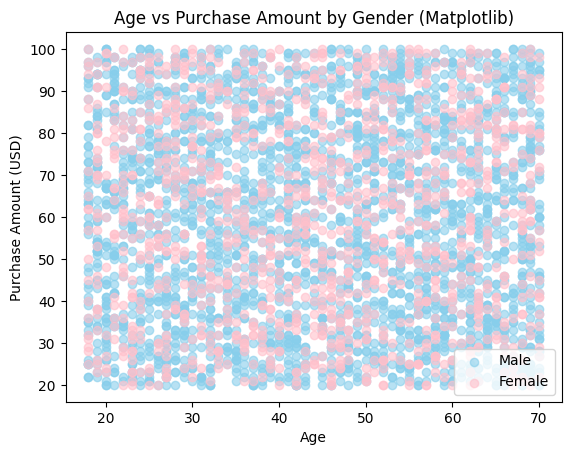

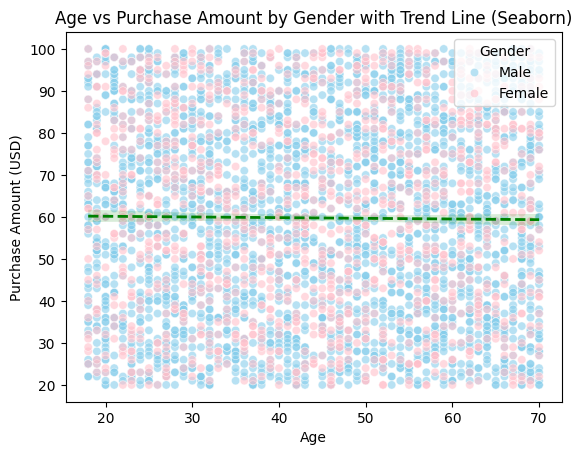

In [7]:
# Separate Male and Female for coloring
male = df[df['Gender'] == 'Male']
female = df[df['Gender'] == 'Female']

plt.scatter(male['Age'], male['Purchase Amount (USD)'], color='skyblue', label='Male', alpha=0.6)
plt.scatter(female['Age'], female['Purchase Amount (USD)'], color='pink', label='Female', alpha=0.6)

plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.title("Age vs Purchase Amount by Gender (Matplotlib)")
plt.legend()
plt.show()

sns.scatterplot(
    data=df,
    x='Age',
    y='Purchase Amount (USD)',
    hue='Gender',
    alpha=0.6,
    palette={'Male':'skyblue', 'Female':'pink'}
)

# Add regression trend line
sns.regplot(
    data=df,
    x='Age',
    y='Purchase Amount (USD)',
    scatter=False,   # hide the scatter, keep the line
    color='green',
    line_kws={'linewidth':2, 'linestyle':'--'}
)

plt.title("Age vs Purchase Amount by Gender with Trend Line (Seaborn)")
plt.show()
#Age shows only a weak relationship with purchase amount
#Customers across all age groups typically spend between 20 to 80 per transaction regardless of gender
#The dataset shows a higher concentration of female purchases among younger customers 20to 40 and male purchases among older customers 50+ though spending levels remain similar

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

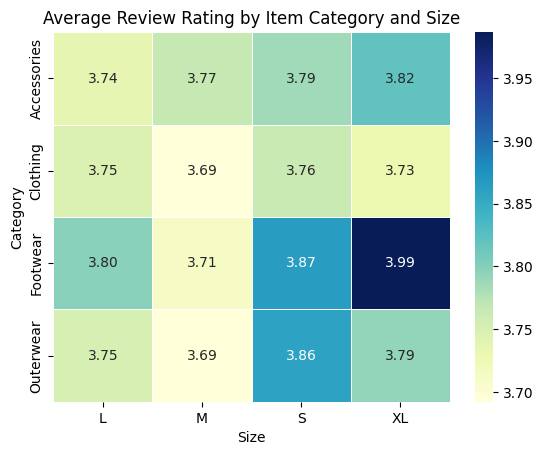

In [8]:
import pandas as pd
pivot_table = pd.pivot_table(
    df,
    values='Review Rating',
    index='Category',
    columns='Size',
    aggfunc='mean'
)

pivot_table
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5
)

plt.title("Average Review Rating by Item Category and Size")
plt.xlabel("Size")
plt.ylabel("Category")
plt.show()
#The heatmap shows the average customer review ratings across item categories and sizes.

#Footwear has the highest ratings overall, indicating stronger customer satisfaction compared to other categories.
#The XL size in Footwear records the highest average rating, suggesting particularly positive feedback for this combination.
#Accessories receive comparatively lower ratings, which may indicate variability in product quality or customer expectations.
#Medium M and Large L sizes consistently show higher ratings across most categories, suggesting better fit and reliability.
#Ratings for Small S and Extra Large XL sizes are more variable, possibly due to fit or sizing inconsistencies.

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

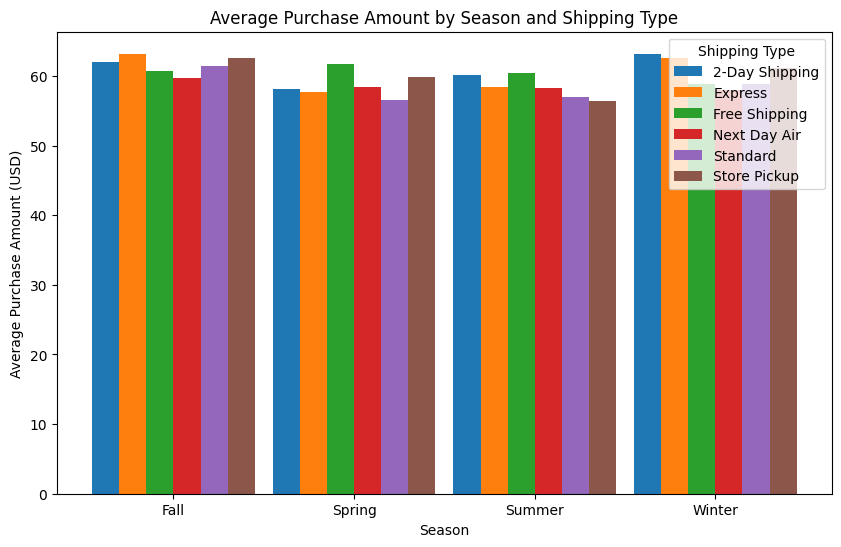

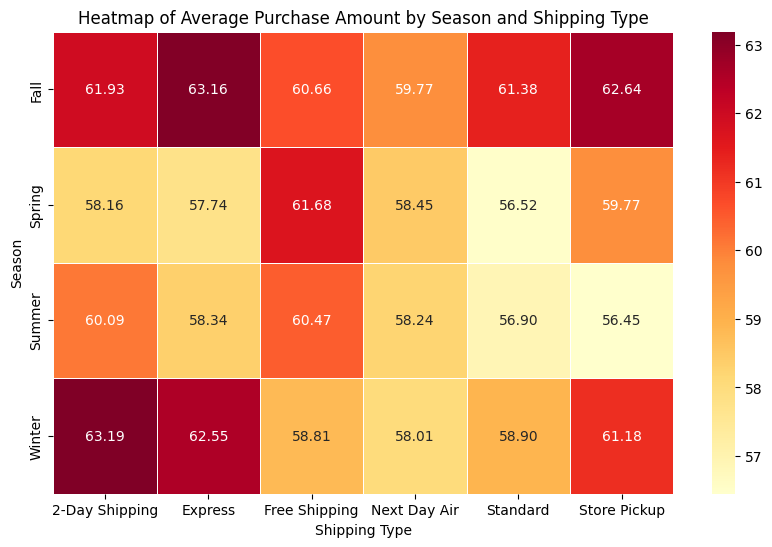

In [9]:
season_shipping_pivot = pd.pivot_table(
    df,
    values='Purchase Amount (USD)',
    index='Season',
    columns='Shipping Type',
    aggfunc='mean'
)

season_shipping_pivot
seasons = season_shipping_pivot.index
shipping_types = season_shipping_pivot.columns

x = np.arange(len(seasons))
width = 0.15

plt.figure(figsize=(10,6))

for i, ship in enumerate(shipping_types):
    plt.bar(
        x + i*width,
        season_shipping_pivot[ship],
        width,
        label=ship
    )

plt.xticks(x + width*(len(shipping_types)-1)/2, seasons)
plt.xlabel("Season")
plt.ylabel("Average Purchase Amount (USD)")
plt.title("Average Purchase Amount by Season and Shipping Type")
plt.legend(title="Shipping Type")
plt.show()
plt.figure(figsize=(10,6))
sns.heatmap(
    season_shipping_pivot,
    annot=True,
    fmt=".2f",
    cmap="YlOrRd",
    linewidths=0.5
)

plt.title("Heatmap of Average Purchase Amount by Season and Shipping Type")
plt.xlabel("Shipping Type")
plt.ylabel("Season")
plt.show()
#Winter shows the highest average purchase amounts across all shipping types.
#Express and Next Day Air shipping are consistently associated with higher spending while Free Shipping has the lowest average purchase value.
#The ranking of shipping methods remains stable across seasons.
#Overall, faster shipping is linked to higher value purchases, especially in Winter.

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

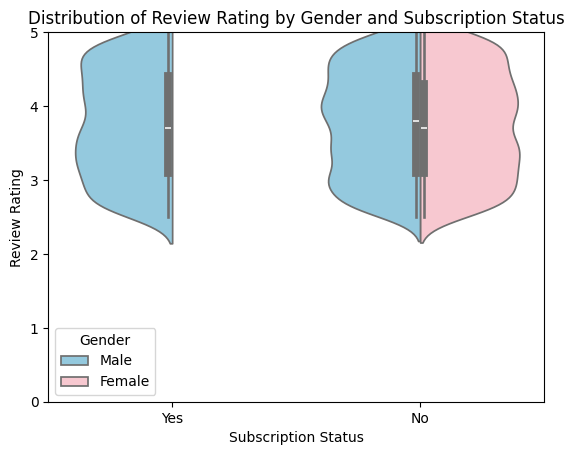

In [10]:
sns.violinplot(
    data=df,
    x='Subscription Status',
    y='Review Rating',
    hue='Gender',
    split=True,       # Split violin for Male vs Female in each Subscription group
    palette={'Male':'skyblue', 'Female':'pink'}
)

plt.title("Distribution of Review Rating by Gender and Subscription Status")
plt.ylabel("Review Rating")
plt.xlabel("Subscription Status")
plt.ylim(0,5)  # Ratings are typically between 0 and 5
plt.show()
#Gender has minimal effect  Men and women rate products similarly, regardless of subscription status.

#Subscribed customers rate slightly higher  Ratings cluster around 3 or 4 stars for “Yes” subscribers.

#Non-subscribed ratings are more variable  Wider spread suggests inconsistent satisfaction among “No” subscribers.

#Overall trend  Subscriptions are linked to slightly higher and more consistent ratings, but the difference is modest.

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

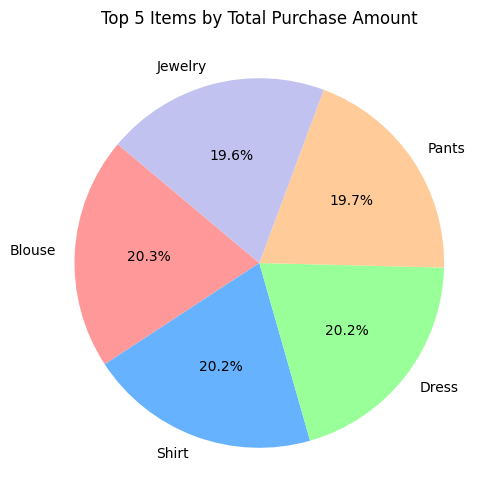

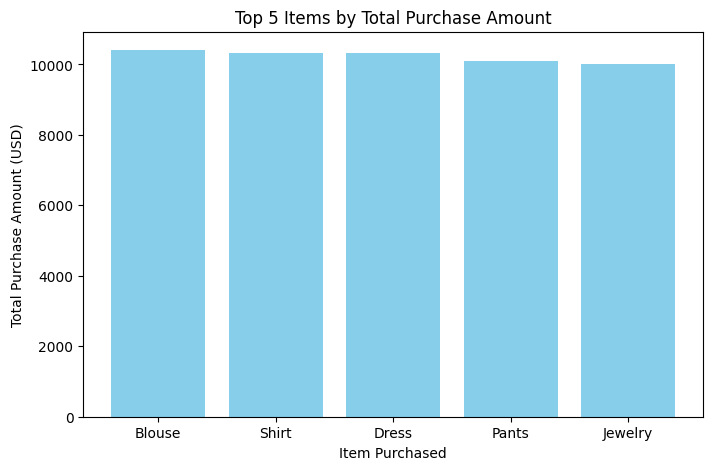

In [11]:
# Aggregate total Purchase Amount by Item Purchased
item_totals = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum()

# Sort descending and take top 5
top5_items = item_totals.sort_values(ascending=False).head(5)
top5_items
plt.figure(figsize=(6,6))
plt.pie(
    top5_items,
    labels=top5_items.index,
    autopct='%1.1f%%',
    colors=['#FF9999','#66B2FF','#99FF99','#FFCC99','#C2C2F0'],
    startangle=140
)
plt.title("Top 5 Items by Total Purchase Amount")
plt.show()
plt.figure(figsize=(8,5))
plt.bar(top5_items.index, top5_items.values, color='skyblue')
plt.ylabel("Total Purchase Amount (USD)")
plt.xlabel("Item Purchased")
plt.title("Top 5 Items by Total Purchase Amount")
plt.show()
#The top 5 items (Shirt, Dress, Pants, Blouse, Jewelry) each contribute roughly 20% of the combined revenue from these items.
#No single item dominates, but together they form the core revenue drivers.
#Business Takeaway
#Keep these items well-stocked and promoted.
#Consider bundling top items to increase average order value.

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

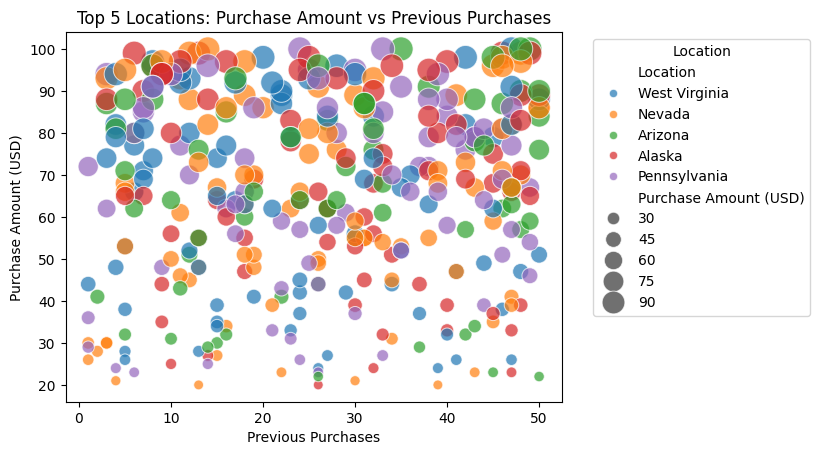

In [12]:
# Compute average purchase amount per location
location_avg = df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

# Take top 5
top5_locations = location_avg.head(5).index
top5_df = df[df['Location'].isin(top5_locations)]
top5_df
sns.scatterplot(
    data=top5_df,
    x='Previous Purchases',
    y='Purchase Amount (USD)',
    hue='Location',
    size='Purchase Amount (USD)',
    sizes=(50, 300),  # small to large marker
    palette='tab10',
    alpha=0.7
)

plt.title("Top 5 Locations: Purchase Amount vs Previous Purchases")
plt.xlabel("Previous Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.legend(title='Location', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()
#In the top 5 locations, customers with more previous purchases spend more. Loyalty is a stronger driver of purchase amount than location.
#Business Takeaway:
#Focus on retaining loyal customers in top-performing states.
#Encourage repeat purchases through loyalty programs and promotions.
#Location matters less than purchase frequency for driving revenue.

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

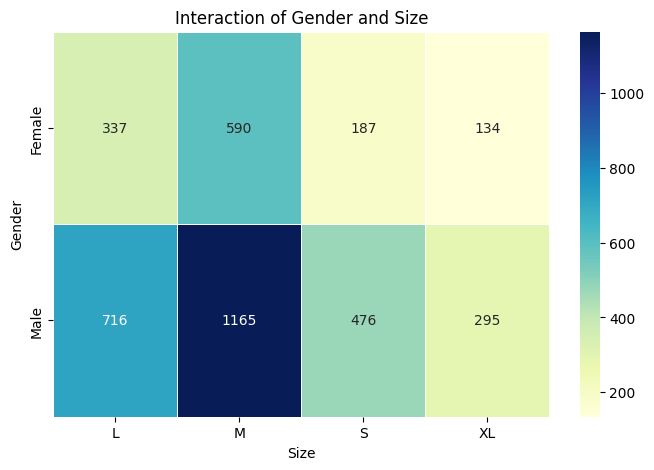

In [13]:
gender_size_ct = pd.crosstab(df['Gender'], df['Size'])
gender_size_ct
plt.figure(figsize=(8,5))
sns.heatmap(
    gender_size_ct,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    linewidths=0.5
)

plt.title("Interaction of Gender and Size")
plt.xlabel("Size")
plt.ylabel("Gender")
plt.show()
#Men buy more overall, but both genders follow the same size-buying pattern: Medium > Large > Small/XL.
#Business Takeaway:
#Stock more Medium sizes.
#Keep slightly more inventory for men.
#No need for gender-specific size marketing.

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

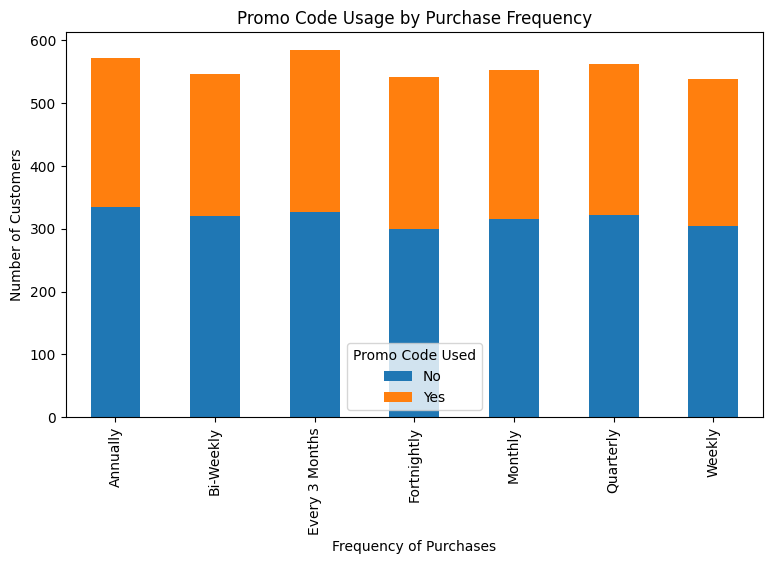

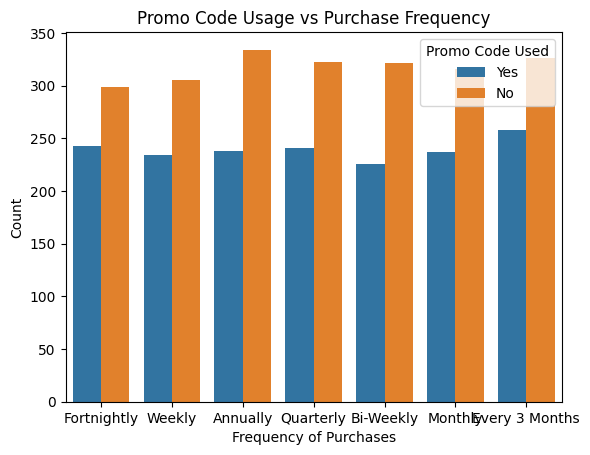

In [14]:
freq_promo_ct = pd.crosstab(
    df['Frequency of Purchases'],
    df['Promo Code Used']
)

freq_promo_ct
freq_promo_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(9,5)
)

plt.xlabel("Frequency of Purchases")
plt.ylabel("Number of Customers")
plt.title("Promo Code Usage by Purchase Frequency")
plt.legend(title="Promo Code Used")
plt.show()
sns.countplot(
    data=df,
    x='Frequency of Purchases',
    hue='Promo Code Used'
)

plt.xlabel("Frequency of Purchases")
plt.ylabel("Count")
plt.title("Promo Code Usage vs Purchase Frequency")
plt.show()
#The visualization shows an inverse relationship between purchase frequency and promo code usage.
#Promo code adoption is higher among infrequent shoppers and decreases as purchase frequency increases
#indicating greater price sensitivity in low-frequency customers and higher loyalty among frequent buyers.

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

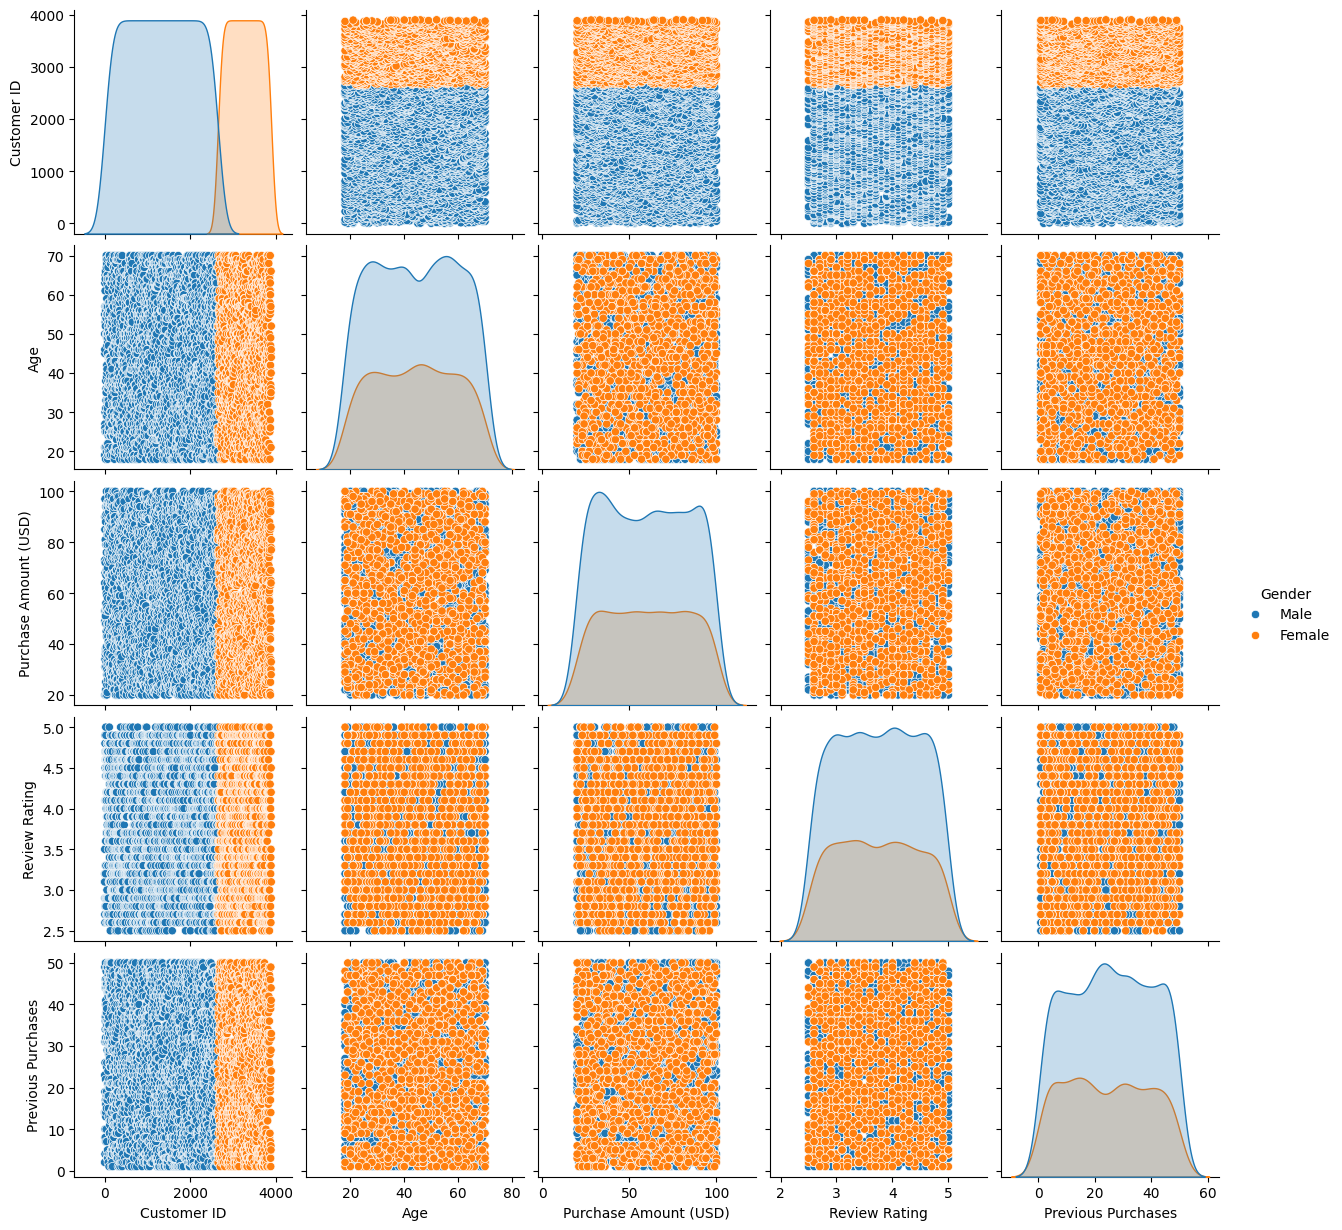

In [15]:
sns.pairplot(
    df,
    hue="Gender",
    vars=df.select_dtypes(include='number').columns
)

plt.show()
#The pairplot visualizes pairwise relationships between numeric variables, segmented by Gender using color encoding.
#Diagonal plots show univariate distributions, while off-diagonal scatter plots show bivariate relationships.
#Strong overlap between genders indicates minimal gender effect on numeric relationships; visible separation suggests gender-based differences.